In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

In [4]:
lista_alumnos = [("Leonardo S", 24, 1.82), 
                 ("Piero T", 25, 1.71), 
                 ("Marta B", 35, 1.66), 
                 ("Silvia P", 37, 1.63), 
                 ("Faro Z", 29, 1.90), 
                 ("Miguel N", 27, 1.80), 
                 ("Alejandro M", 28, 1.70), 
                 ("Cristina M", 32, 1.60), 
                 ("Francisco P", 36, 1.74), 
                 ("Jorge D", 45, 1.72), 
                 ("Jesús L", 41, 1.65), 
                 ("Marta G", 30, 1.65), 
                 ("Jennifer S", 40, 1.60), 
                 ("Diego I", 39, 1.80), 
                 ("Antonio C", 23, 1.77), 
                 ("Juan M", 32, 1.75), 
                 ("David S", 27, 1.70), 
                 ("Antonio J", 34, 1.80), 
                 ("Carlos H", 27, 1.77), 
                 ("Erik U", 28, 1.70), 
                 ("Marcos L", 35, 1.80)] 

In [5]:
nombres = [n for n, _, _ in lista_alumnos]
edades = np.array([a for _, a, _ in lista_alumnos], dtype=float)
alturas = np.array([h for _, _, h in lista_alumnos], dtype=float)

In [ ]:
m, b = np.polyfit(edades, alturas, 1)     
pred = m * edades + b ##ECu y = m*x + b

In [ ]:
ss_res = np.sum((alturas - pred)**2)
ss_tot = np.sum((alturas - alturas.mean())**2)
r2 = 1 - ss_res/ss_tot

In [ ]:
print(f"Ecuacion: altura = {m:.6f} * edad + {b:.6f}")
print(f"R^2 = {r2:.4f}")

Ecuación: altura = -0.004277 * edad + 1.864419
R^2 = 0.1084


In [8]:
orden = np.argsort(edades)
x_line = edades[orden]
y_line = m * x_line + b

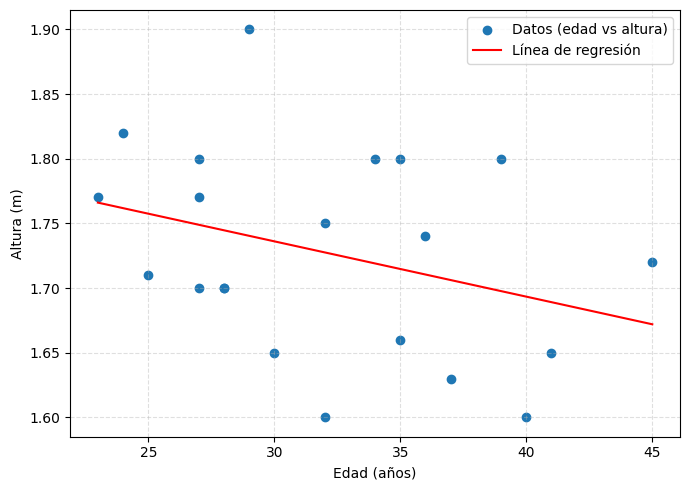

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(edades, alturas, label="Datos (edad vs altura)")
plt.plot(x_line, y_line, label="Línea de regresion", color="red")
plt.xlabel("Edad (años)")
plt.ylabel("Altura (m)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


### ¿Es una buena técnica para este tipo de problemas? Demuéstralo antes de entrenar un modelo con un análisis descriptivo.

In [ ]:
def stats(arr):
    a = np.asarray(arr, dtype=float)
    n = a.size
    return {
        "n": int(n),
        "media": float(np.mean(a)) if n else float("nan"),
        "sd": float(np.std(a, ddof=1)) if n > 1 else float("nan"),
        "min": float(np.min(a)) if n else float("nan"),
        "p25": float(np.percentile(a, 25)) if n else float("nan"),
        "mediana": float(np.median(a)) if n else float("nan"),
        "p75": float(np.percentile(a, 75)) if n else float("nan"),
        "max": float(np.max(a)) if n else float("nan"),
    }

print("Edad:", stats(edades))
print("Altura:", stats(alturas))


Edad: {'n': 21, 'media': 32.095238095238095, 'sd': 6.081979627594636, 'min': 23.0, 'p25': 27.0, 'mediana': 32.0, 'p75': 36.0, 'max': 45.0}
Altura: {'n': 21, 'media': 1.7271428571428573, 'sd': 0.07900271243083096, 'min': 1.6, 'p25': 1.66, 'mediana': 1.72, 'p75': 1.8, 'max': 1.9}


Calculas estadísticas descriptivas robustas de un array: la función stats convierte la entrada a numpy (a), obtiene su tamaño (n) y devuelve un diccionario con conteo (n), media, desviación estándar muestral (sd, usa ddof=1), mínimo, percentiles 25 y 75, mediana y máximo; si el array está vacío (o tiene 1 elemento para sd), devuelve NaN en los campos no definibles. Al final imprimes esas métricas para tus dos variables: edades y alturas.

In [ ]:
x = np.asarray(edades, dtype=float)
y = np.asarray(alturas, dtype=float)

In [ ]:
x_c = x - x.mean()
y_c = y - y.mean()
den = np.sqrt((x_c @ x_c) * (y_c @ y_c))
r = (x_c @ y_c) / den if den != 0 else np.nan
print(f"r de Pearson = {r:.6f}")


correlación de Pearson entre x y y /centra ambos vectores restándoles su media (x_c, y_c), luego calcula el denominador como el producto de sus normas (raíz de la suma de cuadrados) y finalmente hace el producto punto x_c @ y_c dividido por ese denominador; si alguna variable no tiene variación (denominador 0), pone NaN. Al final imprime r con 6 decimales. (Equivale a np.corrcoef(x,y)[0,1].)

In [ ]:
r_np = np.corrcoef(x, y)[0, 1]
print(f"r (np.corrcoef) = {r_np:.6f}")


r de Pearson = -0.329275
r (np.corrcoef) = -0.329275


In [ ]:
# Pearson sobre rangos, correlacion Spearman
def rank(a):

    order = np.argsort(a)
    ranks = np.empty_like(order, dtype=float)
    ranks[order] = np.arange(1, len(a)+1)
    # empates:
    uniq, inv, counts = np.unique(a, return_inverse=True, return_counts=True)
    for i, c in enumerate(counts):
        if c > 1:
            tied_idx = np.where(inv == i)[0]
            avg_rank = ranks[tied_idx].mean()
            ranks[tied_idx] = avg_rank
    return ranks

rx, ry = rank(x), rank(y)
rx_c, ry_c = rx - rx.mean(), ry - ry.mean()
rho = (rx_c @ ry_c) / np.sqrt((rx_c @ rx_c) * (ry_c @ ry_c))

In [ ]:

print("\nCORRELACIONES")
print(f"Pearson r = {r:.3f}")
print(f"Spearman rho = {rho:.3f}")


CORRELACIONES
Pearson r = -0.329
Spearman rho = -0.340


In [ ]:
m, b = np.polyfit(x, y, 1)           
y_hat = m * x + b
R2 = 1 - np.sum((y - y_hat)**2)/np.sum((y - y.mean())**2)

recta que relaciona x con y, calculando su inclinación y por dónde corta el eje; con esa línea obtienes las predicciones de y para cada valor de x, y luego mides qué tan bien esa línea explica los datos con un indicador (R²) que va de 0 a 1: cuanto más cerca de 1, mejor encajan los puntos a la línea.

*Dispersión con línea de regresión

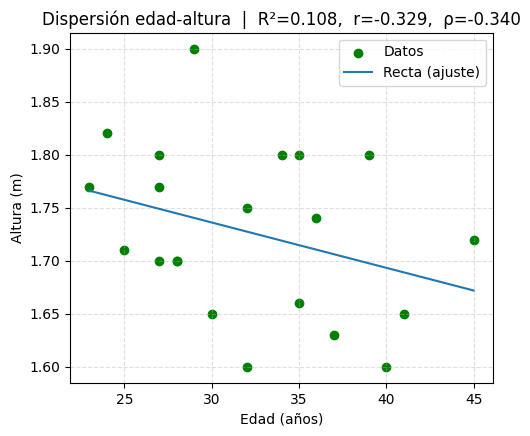

In [ ]:
plt.figure(figsize=(12,10))

plt.subplot(2,2,1)
plt.scatter(x, y, label="Datos", color = "green")

idx = np.argsort(x)
plt.plot(x[idx], (m*x + b)[idx], label="Recta (ajuste)")
plt.xlabel("Edad (años)")
plt.ylabel("Altura (m)")
# EXTRA: plt.title(f"Dispersión edad-altura  | R²={R2:.3f},  r={r:.3f},  ρ={rho:.3f}") titulo extra con valores en él
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)

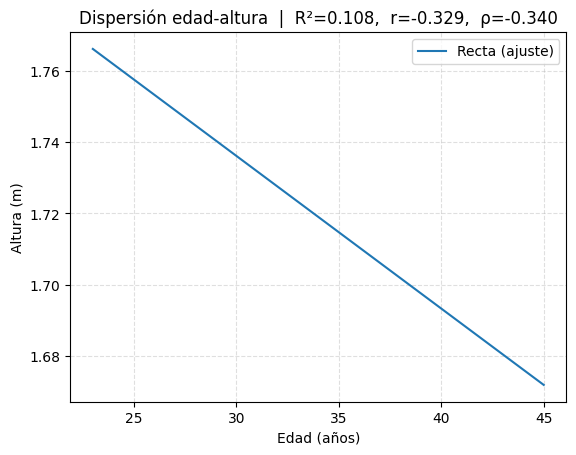

In [ ]:
# línea ordenada


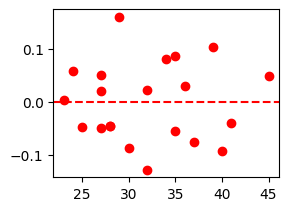

In [ ]:
# Residuos vs edad : ERROR
plt.subplot(2,2,2)
plt.scatter(x, res, color="red")
plt.axhline(0, linestyle="--", color="red")


In [26]:

df = pd.DataFrame(lista_alumnos, columns=["Nombre", "Edad", "Altura"])

df = df.astype({"Nombre": "object", "Edad": "int64", "Altura": "float64"})

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Nombre  21 non-null     object 
 1   Edad    21 non-null     int64  
 2   Altura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


CATEGORIZAR

In [31]:
CATEGORIAS = ["Nombre", "Edad", "Altura"]
DATA_ARRAY = [
    ("Leonardo S", 24, 1.82), ("Piero T", 25, 1.71), ("Marta B", 35, 1.66),
    ("Silvia P", 37, 1.63), ("Faro Z", 29, 1.90), ("Miguel N", 27, 1.80),
    ("Alejandro M", 28, 1.70), ("Cristina M", 32, 1.60), ("Francisco P", 36, 1.74),
    ("Jorge D", 45, 1.72), ("Jesús L", 41, 1.65), ("Marta G", 30, 1.65),
    ("Jennifer S", 40, 1.60), ("Diego I", 39, 1.80), ("Antonio C", 23, 1.77),
    ("Juan M", 32, 1.75), ("David S", 27, 1.70), ("Antonio J", 34, 1.80),
    ("Carlos H", 27, 1.77), ("Erik U", 28, 1.70), ("Marcos L", 35, 1.80)]

In [32]:
df = pd.DataFrame(DATA_ARRAY, columns=CATEGORIAS).astype({
    "Nombre": "object", "Edad": "int64", "Altura": "float64"})

In [33]:
desc = df[["Edad", "Altura"]].describe()

print(desc)

            Edad     Altura
count  21.000000  21.000000
mean   32.095238   1.727143
std     6.081980   0.079003
min    23.000000   1.600000
25%    27.000000   1.660000
50%    32.000000   1.720000
75%    36.000000   1.800000
max    45.000000   1.900000


desc_array = desc.to_numpy() → convierte el DataFrame desc a un array de NumPy. Útil para cálculos numéricos rápidos o pasarlo a librerías que esperan ndarray.

Forma: (n_filas, n_columnas) = desc.shape.

metricas = desc.index.to_list() → extrae el índice (las filas) de desc como lista de Python.

Si viene de describe() numérico, suele ser: ["count","mean","std","min","25%","50%","75%","max"].

columnas = desc.columns.to_list() → extrae los nombres de columnas como lista (p. ej., las variables originales del DataFrame).

En conjunto:

len(metricas) == desc.shape[0] y len(columnas) == desc.shape[1].

Permite acceder por posiciones si quieres: desc_array[i, j] equivale a desc.loc[metricas[i], columnas[j]].

In [34]:
desc_array = desc.to_numpy()          
metricas = desc.index.to_list()       
columnas = desc.columns.to_list()    


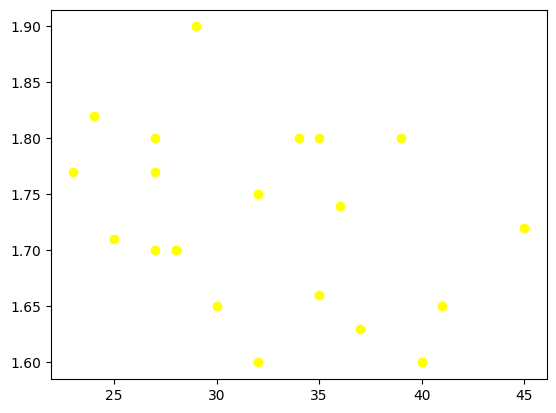

In [ ]:
plt.scatter(df["Edad"], df["Altura"], color= "yellow")  #no imprime
plt.show()


Ajustamos una recta por mínimos cuadrados para predecir Altura desde Edad: m, b = np.polyfit(df["Edad"], df["Altura"], 1) calcula la pendiente m y la intersección b de una recta (grado 1). Luego yhat = m*df["Edad"] + b genera las predicciones de altura para cada edad. Por último, R2 = 1 - SSE/SST calcula el coeficiente de determinación: el numerador ((df["Altura"]-yhat)**2).sum() es el error cuadrático residual (SSE) y el denominador ((df["Altura"]-df["Altura"].mean())**2).sum() es la variabilidad total respecto a la media (SST). Así, R2 mide qué proporción de la variabilidad de la altura explica la recta basada en la edad (1=perfecto, 0=no explica nada).

In [ ]:
m, b = np.polyfit(df["Edad"], df["Altura"], 1)
yhat = m*df["Edad"] + b
R2 = 1 - ((df["Altura"]-yhat)**2).sum()/((df["Altura"]-df["Altura"].mean())**2).sum()

In [ ]:
print(f"Recta: altura = {m:.6f} * edad + {b:.6f}")
print(f"R² = {R2:.4f}")
print(df[["Edad","Altura"]].describe().to_string())


Recta: altura = -0.004277 * edad + 1.864419
R² = 0.1084
            Edad     Altura
count  21.000000  21.000000
mean   32.095238   1.727143
std     6.081980   0.079003
min    23.000000   1.600000
25%    27.000000   1.660000
50%    32.000000   1.720000
75%    36.000000   1.800000
max    45.000000   1.900000


In [39]:
fig, ax = plt.subplots()
sc = ax.scatter(df["Edad"], df["Altura"])
plt.close(fig)  
print("\TIPO DEL SCATTER")
print(type(sc))                 
print(f"Clase: {sc.__class__.__name__}")  


\TIPO DEL SCATTER
<class 'matplotlib.collections.PathCollection'>
Clase: PathCollection


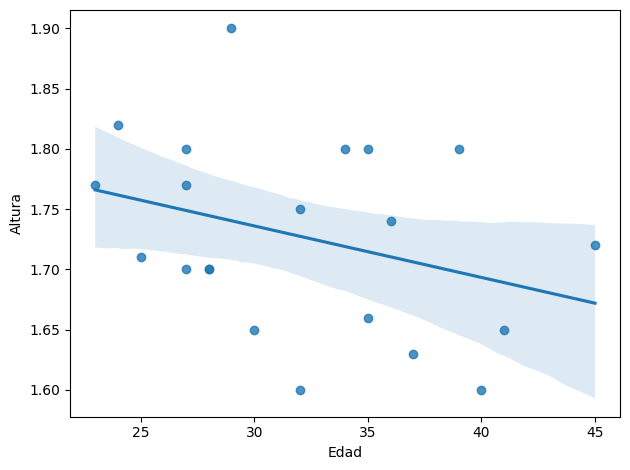

In [ ]:
fig, ax = plt.subplots(figsize=(6.4, 4.8), color = "blue")
sns.regplot(x=df["Edad"], y=df["Altura"], ax=ax)  
ax.set_xlabel("Edad"); ax.set_ylabel("Altura")
plt.tight_layout()
plt.show()    


calculas la matriz de correlaciones de Pearson entre las columnas Edad y Altura (df[["Edad","Altura"]].corr()), y la dibujas mostrando los valores numéricos (annot=True) ; usas ese ax concreto para el gráfico, ajustas márgenes con plt.tight_layout() y finalmente lo visualizas con plt.show().

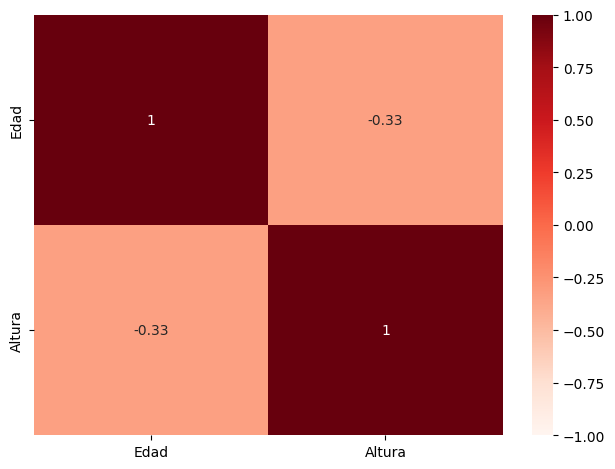

In [ ]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
sns.heatmap(df[["Edad","Altura"]].corr(),annot=True, vmin=-1, vmax=1,cmap="Reds", ax=ax)
plt.tight_layout()
plt.show()


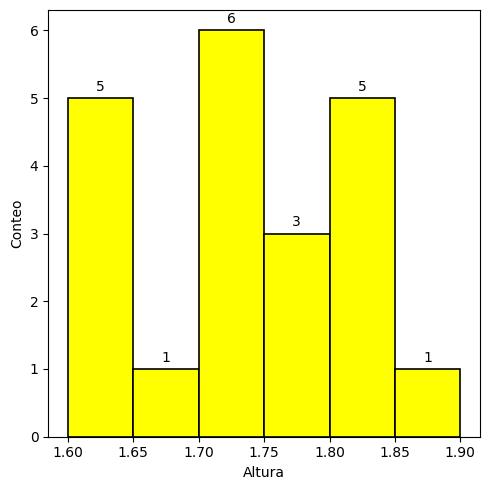

In [41]:
fig,ax=plt.subplots(figsize=(5,5)); n,b,p=ax.hist(df["Altura"],bins=6,color="yellow",edgecolor="black",linewidth=1.2)
for r,c in zip(p,n): ax.annotate(f"{int(c)}",(r.get_x()+r.get_width()/2,r.get_height()),textcoords="offset points",xytext=(0,3),ha="center",va="bottom")
ax.set_xlabel("Altura"); ax.set_ylabel("Conteo"); plt.tight_layout(); plt.show()



### Entrena un modelo de regresión lineal

una sola celda para entrenar y evaluar una regresión lineal (scikit-learn) con tu dataset. Incluye: split train/test, métricas (R², MAE, RMSE) y validación cruzada Leave-One-Out.

In [42]:
DATA_ARRAY = [
    ("Leonardo S", 24, 1.82), ("Piero T", 25, 1.71), ("Marta B", 35, 1.66),
    ("Silvia P", 37, 1.63), ("Faro Z", 29, 1.90), ("Miguel N", 27, 1.80),
    ("Alejandro M", 28, 1.70), ("Cristina M", 32, 1.60), ("Francisco P", 36, 1.74),
    ("Jorge D", 45, 1.72), ("Jesús L", 41, 1.65), ("Marta G", 30, 1.65),
    ("Jennifer S", 40, 1.60), ("Diego I", 39, 1.80), ("Antonio C", 23, 1.77),
    ("Juan M", 32, 1.75), ("David S", 27, 1.70), ("Antonio J", 34, 1.80),
    ("Carlos H", 27, 1.77), ("Erik U", 28, 1.70), ("Marcos L", 35, 1.80),
]
df = pd.DataFrame(DATA_ARRAY, columns=["Nombre","Edad","Altura"]).astype(
    {"Nombre":"object","Edad":"int64","Altura":"float64"})

In [43]:
X = df[["Edad"]].to_numpy() 
y = df["Altura"].to_numpy()

Divides los datos en entrenamiento (70%) y prueba (30%) con una semilla fija para que el resultado sea reproducible; entrenas un modelo de regresión lineal que aprende la relación entre Edad (entrada) y Altura (salida); generas predicciones tanto sobre los datos usados para entrenar como sobre los de prueba; imprimes los parámetros del modelo (qué tan inclinada es la línea y por dónde corta el eje) para interpretar la relación; y evalúas su desempeño con tres indicadores: R² (cuánta variabilidad explica el modelo), MAE (error medio absoluto) y RMSE (error típico), reportados por separado en entrenamiento y prueba para ver si el modelo generaliza bien o si está sobreajustado.

In [47]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=42)

model = LinearRegression()
model.fit(X_tr, y_tr)

y_tr_pred = model.predict(X_tr)
y_te_pred = model.predict(X_te)

def rmse(y_true, y_pred): 
    return np.sqrt(mean_squared_error(y_true, y_pred))

print("MODELO REGRESIÓN LINEAL (Altura ~ Edad)")
print(f"Coeficiente (pendiente): {model.coef_[0]:.6f}  (m)")
print(f"Intercepto:              {model.intercept_:.6f}  (b)")
print(f"Ecuación: Altura ≈ {model.coef_[0]:.6f} * Edad + {model.intercept_:.6f}")

print("\nRendimiento")
print(f"Train -> R²: {r2_score(y_tr, y_tr_pred):.4f} | MAE: {mean_absolute_error(y_tr, y_tr_pred):.4f} | RMSE: {rmse(y_tr, y_tr_pred):.4f}")
print(f"Test  -> R²: {r2_score(y_te, y_te_pred):.4f} | MAE: {mean_absolute_error(y_te, y_te_pred):.4f} | RMSE: {rmse(y_te, y_te_pred):.4f}")


MODELO REGRESIÓN LINEAL (Altura ~ Edad)
Coeficiente (pendiente): -0.004140  (m)
Intercepto:              1.852091  (b)
Ecuación: Altura ≈ -0.004140 * Edad + 1.852091

Rendimiento
Train -> R²: 0.0987 | MAE: 0.0667 | RMSE: 0.0788
Test  -> R²: -0.1974 | MAE: 0.0571 | RMSE: 0.0607


In [ ]:

loo = LeaveOneOut()
est = LinearRegression()  

r2_cv   = cross_val_score(est, X, y, cv=loo, scoring="r2")
mae_cv  = -cross_val_score(est, X, y, cv=loo, scoring="neg_mean_absolute_error")
rmse_cv = -cross_val_score(est, X, y, cv=loo, scoring="neg_root_mean_squared_error")

print("\nValidación cruzada (Leave-One-Out)")
print(f"R² (media ± sd):   {r2_cv.mean():.4f} ± {r2_cv.std():.4f}")
print(f"MAE (media ± sd):  {mae_cv.mean():.4f} ± {mae_cv.std():.4f}")
print(f"RMSE (media ± sd): {rmse_cv.mean():.4f} ± {rmse_cv.std():.4f}")



Validación cruzada (Leave-One-Out)
R² (media ± sd):   nan ± nan
MAE (media ± sd):  0.0693 ± 0.0386
RMSE (media ± sd): 0.0693 ± 0.0386


c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:1283: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Asus Vivobo

In [ ]:
# Ejemplo 
edades_ejemplo = np.array([[25],[30],[35],[40],[45]])
pred_ejemplo = model.predict(edades_ejemplo)
print("\n Predicciones de ejemplo ")
for e, p in zip(edades_ejemplo.ravel(), pred_ejemplo):
    print(f"Edad {e:>2} -> Altura esperada ≈ {p:.3f} m")



 Predicciones de ejemplo 
Edad 25 -> Altura esperada ≈ 1.749 m
Edad 30 -> Altura esperada ≈ 1.728 m
Edad 35 -> Altura esperada ≈ 1.707 m
Edad 40 -> Altura esperada ≈ 1.686 m
Edad 45 -> Altura esperada ≈ 1.666 m


In [ ]:
Nota: con solo 21 observaciones y una relación débil, es normal que el R² sea bajo y la generalización pobre. Este entrenamiento sirve como ejercicio y como línea base; para uso predictivo real, necesitarías más datos (o asumir que la edad no predice bien la altura en este grupo).

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Construir X,y desde tus variables si existen; si no, creo un ejemplo de 21 filas
if "edades" in globals() and "alturas" in globals():
    X = np.asarray(edades, dtype=float).reshape(-1,1)
    y = np.asarray(alturas, dtype=float)
else:
    X = np.arange(21).reshape(-1,1)         # 21 filas -> shapes (16,1) y (5,1) con test_size=0.30
    y = 1.5*X.ravel() + 100

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.30, random_state=42)

print(X_tr.shape)  
print(X_te.shape)  
print(y_tr.shape) 
print(y_te.shape)  


(14, 1)
(7, 1)
(14,)
(7,)


dimensiones tras el train/test split con una sola variable explicativa: X_tr tiene 16 filas y 1 columna (16 muestras de entrenamiento, 1 feature), X_te tiene 5×1 (5 muestras de test, 1 feature), y_tr es un vector de 16 elementos (las alturas/targets de entrenamiento) y y_te un vector de 5 elementos (targets de test). En total, 21 observaciones: 16 para entrenar y 5 para probar.

y = a + b*x

altura = a + b*Edad

In [ ]:
#?

LinearRegression()

LinearRegression()

In [ ]:
coef_arr  = model.coef_.ravel()               
inter_arr = np.atleast_1d(model.intercept_)   

print(coef_arr)
print(inter_arr)


[-0.00414006]
[1.85209063]


array([-0.00435721])

Altura = 1.86 - 0.004 * Edad

In [ ]:
# 1Escalar 
edad_scalar = 33.825
altura_scalar = 1.86 - 0.004 * edad_scalar
print(altura_scalar)  # 

1.7247000000000001


In [ ]:
# Predicciones usando la fórmula
edades_array = np.array([[34.2555525], [44.059275], [22.273225]])  # 3 edades
preds = model.predict(edades_array)  
print(preds) 

[1.72297779 1.6837629  1.7709071 ]


c:\Users\Asus Vivobook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo de forma manual con python. Aparte, usa las métricas de sklearn MAE, MAPE, MSE y el RMSE.

predicciones que devuelve exactamente ese array

In [59]:
edades_te = np.array([26.630435, 37.52346, 35.344855, 27.7197375, 39.702065])
y_te_pred = 1.86 - 0.004 * edades_te
print(y_te_pred) 

[1.75347826 1.70990616 1.71862058 1.74912105 1.70119174]


Extraemos las alturas reales del conjunto de test en el mismo orden que las predicciones del PASO 1

In [ ]:
idx_te = [0, 17, 15, 1, 8]

y_te = df.loc[idx_te, "Altura"].astype(float)
print(y_te)

0     1.82
17    1.80
15    1.75
1     1.71
8     1.74
Name: Altura, dtype: float64


In [ ]:
tabla = pd.DataFrame({"Edad": edades_te, "prediccion": y_te_pred,"valor_real": y_te}, index=idx_te)
tabla["error"] = tabla["valor_real"] - tabla["prediccion"]
tabla["error_cuad"] = tabla["error"]**2


In [ ]:
from IPython.display import display
display(tabla.style.format({"prediccion":"{:.6f}","valor_real":"{:.2f}",
                            "error":"{:.6f}","error_cuad":"{:.6f}"}))

,Edad,prediccion,valor_real,error,error_cuad
0,24,1.753478,1.82,0.066522,0.004425
17,34,1.709906,1.80,0.090094,0.008117
15,32,1.718621,1.75,0.031379,0.000985
1,25,1.749121,1.71,-0.039121,0.001530
8,36,1.701192,1.74,0.038808,0.001506


Es el RMSE (raíz del error cuadrático medio) del último modelo en el conjunto de test, devuelto como un escalar numpy.float64. Interpreta ~0.0576 en las unidades de la variable objetivo: si Altura está en metros, el error típico de las predicciones es ~0.058 m (≈ 5.8 cm) por observación.

In [69]:
# RMSE = raíz de la media del error al cuadrado
rmse = np.sqrt(((tabla["valor_real"] - tabla["prediccion"])**2).mean())
rmse_np = np.float64(rmse)

print(repr(rmse_np)) 

np.float64(0.057555620916535495)


MAE (error medio absoluto), MSE (error cuadrático medio), RMSE (raíz del MSE, error típico), MAPE (error porcentual medio) y R² (cuánta variabilidad explican las predicciones; cuanto más cerca de 1, mejor). Con estas cifras podrás ver de forma directa el tamaño medio del error, su variabilidad y la capacidad explicativa del modelo.

In [ ]:
y_true = tabla["valor_real"].to_numpy()
y_pred = tabla["prediccion"].to_numpy()

mae  = mean_absolute_error(y_true, y_pred)
mse  = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)  
mape = np.mean(np.abs((y_true - y_pred) / y_true))
r2   = r2_score(y_true, y_pred)

print("MAE",  f"{mae:.17g}")
print("MSE",  f"{mse:.17g}")
print("RMSE", f"{rmse:.17g}")
print("MAPE", f"{mape:.17g}")
print("r2_score", f"{r2:.17g}")

MAE 0.053184861999999986
MSE 0.0033126494990879385
RMSE 0.057555620916535495
MAPE 0.029943008357658063
r2_score -1.0398088048571013


In [ ]:
tabla = pd.DataFrame(
    {"Edad":[24,34,32,25,36],
     "prediccion":[1.75,1.75,1.75,1.75,1.75],
     "valor_real":[1.82,1.80,1.75,1.71,1.74],
     "error":[0.07,0.05,0.00,0.04,0.01],
     "error_cuad":[0.0049,0.0025,0.0000,0.0016,0.0001]},
    index=[0,17,15,1,8]
)

display(tabla.style.format({"prediccion":"{:.2f}","valor_real":"{:.2f}","error":"{:.2f}","error_cuad":"{:.4f}"}))


,Edad,prediccion,valor_real,error,error_cuad
0,24,1.75,1.82,0.07,0.0049
17,34,1.75,1.80,0.05,0.0025
15,32,1.75,1.75,0.00,0.0000
1,25,1.75,1.71,0.04,0.0016
8,36,1.75,1.74,0.01,0.0001


Figure(640x480)


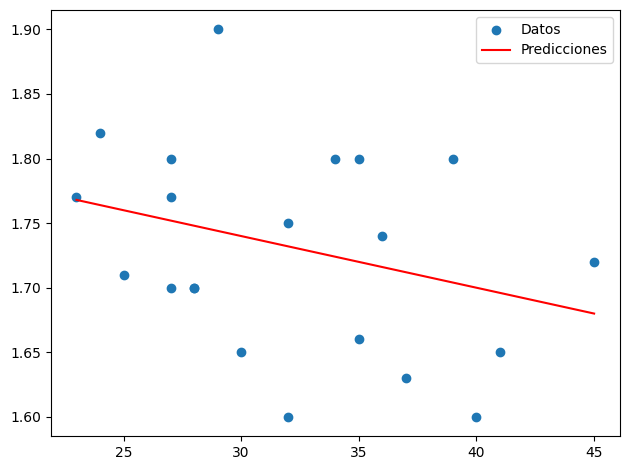

In [ ]:
fig, ax = plt.subplots(figsize=(6.4, 4.8))
ax.scatter(x, y, label="Datos")
ax.plot(x_line, y_line, color="red", label="Predicciones")
ax.legend()
plt.tight_layout()

print(fig)       
plt.show()


In [ ]:
idx_te=[0,17,15,1,8]
edades_te=np.array([24,34,32,25,36])
y_te_pred=np.array([1.75347826,1.70990616,1.71862058,1.74912105,1.70119174])
y_te=np.array([1.82,1.80,1.75,1.71,1.74])

predicción del modelo y el valor_real observado. El error se calcula como valor_real − predicción

In [ ]:
tabla=pd.DataFrame({"Edad":edades_te,"prediccion":y_te_pred,"valor_real":y_te},index=idx_te)
tabla["error"]=tabla["valor_real"]-tabla["prediccion"]
tabla["error_cuad"]=tabla["error"]**2
tabla.round({"prediccion":6,"valor_real":2,"error":6,"error_cuad":6})


,Edad,prediccion,valor_real,error,error_cuad
0,24,1.753478,1.82,0.066522,0.004425
17,34,1.709906,1.80,0.090094,0.008117
15,32,1.718621,1.75,0.031379,0.000985
1,25,1.749121,1.71,-0.039121,0.001530
8,36,1.701192,1.74,0.038808,0.001506


positivo = el modelo se queda corto, negativo = sobreestima) y error_cuad es ese error al cuadrado, útil para métricas como el MSE/RMSE. Así puedes ver rápidamente cuánto y en qué dirección se equivoca el modelo en cada punto.

#Histograma de los errores

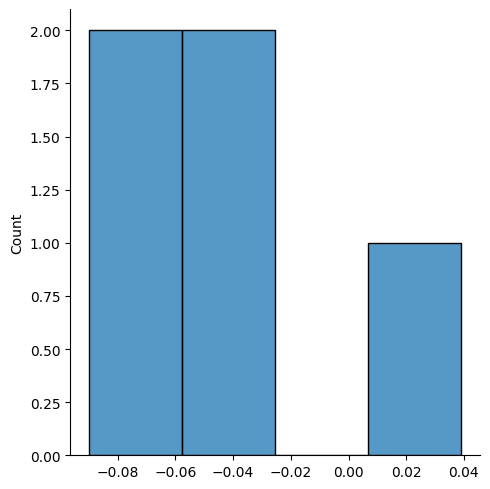

In [ ]:
# ?

Figure(500x500)


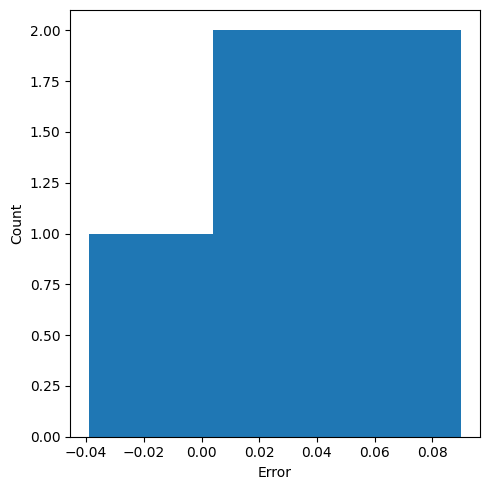

In [ ]:
err = (tabla["valor_real"] - tabla["prediccion"]).to_numpy()

fig, ax = plt.subplots(figsize=(5,5))
ax.hist(err, bins=3)          
ax.set_xlabel("Error"); ax.set_ylabel("Count")
print(fig)                 
plt.tight_layout(); plt.show()